In [1]:
from IPython.display import Image, display, HTML

CSS = """
.output {
    align-items: center;
}

.text_cell_render { /* Customize text cells */
line-height:2.5em;
}
"""

HTML('<style>{}</style>'.format(CSS))

# ITEMS TO RESOLVE:
* CDF: Distribution or Density?
* Change $\approx$ to tildes

# 6.041x - Unit 5: Continuous Random Variables
### Notes by Leo Robinovitch

***
## Core Concepts:

**Probability Density Functions (PDFs):** replace PMFs (Probability Mass Functions) from discrete random variables
* Discrete Random Variables have PMFs $p_X(x)$ where the following holds true
  * $P(a \leq x \leq b) = \sum\limits_{x:a \leq x \leq b}p_X(x)$
  * $p_X(x) \geq 0$
  * $\sum\limits_{x}p_X(x) = 1$
  <br><br>
  
* A random variable is **continuous** if the following holds true for its PDF $f_X(x)$:
  * $P(a \leq x \leq b) = \int_{a}^{b}f_X(x)dx$
  * $f_X(x) \geq 0$
  * $\int_{-\infty}^{\infty}f_X(x)dx = 1$
  <br><br>
  
* Units of PDF are probability per unit length:
  * $P(a \leq x \leq x + \delta) \approx f_X(a) \bullet \delta \to$ using rectangular approximation
  <br><br>
* Also notable from above: $P(x = a) =  0 \to$ **any particular point in a PDF has zero probability** (exactly contrary to PMFs)
* PDFs do not have to be continuous functions (they can have discontinuities)
* Finally, $P(a \leq x \leq b) = P(a < x < b) \to$ endpoints don't matter because PDFs deal with intervals
<br><br>


**Continuous Uniform Random Variable:** rather than integers between a and b being possible (discrete case), any real number between a and b is possible


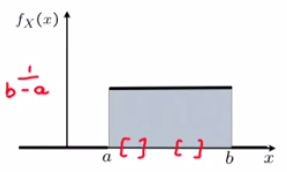

In [2]:
display(Image(filename='l8_1.png', embed=True, width=300))

** Expectation of Continuous Random Variables:** average in a large number of independent repetitions of a probabilistic experiment
$$E[X] = \int_{-\infty}^{\infty}xf_X(x)dx$$
* Holds true as long as $\int_{-\infty}^{\infty}|x|f_X(x)dx < \infty$
* Still true that expectation/average is "center of gravity" of PDF
* If $X \geq 0$, then $E[X] \geq 0$
* If $a \leq X \leq b$, then $a \leq E[X] \leq b$
<br><br>


**Expected Value Rule for Uniform Random Variables:**
$$E[g(X)] = \int_{-\infty}^{\infty}g(x)f_X(x)dx$$
<br><br>


**Linearity of Expectations:**
$$E[aX + b] = aE[X] + b$$
* Derivation from applying Expected Value Rule to $g(X) = aX + b$ and separating terms (same as with discrete)
<br><br>


**Variance of Uniform Random Variables:**
* Recall $var(X) = E[(X - \mu)^2]$ where $\mu = E[X]$
* Using Expected Value Rule:
$$var(X) = \int_{-\infty}^{\infty}(x - \mu)^2f_X(x)dx$$
<br><br>


**Standard Deviation of Uniform Random Variables:**
$$\sigma_X = \sqrt{var(X)}$$
<br><br>


**Variance Rules:**
* Still true that $var(aX + b) = a^2var(X)$
* Useful formula still holds: $var(X) = E[X^2] - (E[X])^2$
<br><br>


**Mean and Variance of Uniform Continuous Random Variable:**
* $E[X] = \int_{-\infty}^{\infty}xf_X(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{b - a}{2} \to$ same as discrete and intuitive b/c uniform PDF is symmetrical about expectation
* Variance calculation:
  * $E[X^2] = \int_{a}^{b}x^2\frac{1}{b-a}dx$
  * $var(X) = E[X^2] - (E[X])^2 = \frac{(b - a)^2}{12} \to$ similar but not same as discrete
  <br><br>
* As such, $\sigma = \frac{b - a}{\sqrt{12}}$ for uniform PDF
<br><br>


**Exponential Random Variables:** single parameter $\lambda > 0 \to$ generally models **waiting time until an event occurs**

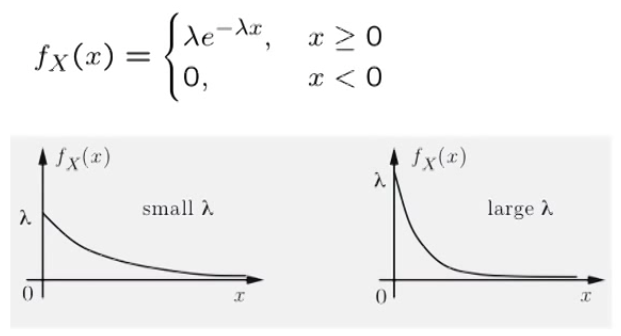

In [3]:
display(Image(filename='l8_2.png', embed=True, width=500))

* Random Variable $X$: some waiting time until event occurs
* Looks very similar to Geometric Random Variable, but in continuous form
* Start point is lambda and rate of decay is also lambda
* Tail Probability $P(X \geq a)$:
$$P(X \geq a) = \int_{a}^{\infty}\lambda e^{-\lambda x}dx = e^{-\lambda a}$$
<br>
* Note that this means that if $a = 0$, area under whole PDF is 1 as expected
* Expected value of Exponential Random Variable:
$$E[X] = \int_{0}^{\infty} x \bullet \lambda e^{-\lambda x}dx = \frac{1}{\lambda}$$
<br>
* To calculate Variance of Exponential Random Variable:
$$E[X^2] = \int_{0}^{\infty} x^2 \bullet \lambda e^{-\lambda x}dx = \frac{2}{\lambda^2}$$
<br>
$$var(X) = E[X^2] - (E[X])^2 = \frac{1}{\lambda^2}$$
<br><br>


**Memorylessness of Exponential Random Variable:** again analogous to Geometric Discrete Random Variable
* Example: lightbulb lifetime $T$ (time to burnout) modeled as exponential random variable with parameter $\lambda$.
  * Recall $P(T > x) = e^{-\lambda x}$ for $x \geq 0$
  <br><br>
* Knowing that certain lightbulb has already been operating for $t$ time units and is still working $\to T > t$
* How much longer will this lightbulb operate? $\to X$ is remaining lifetime, $X = T - t$
* Probability that lightbulb lasts another $x$ time units: $P(X > x | T > t)$
  * Using conditional probability definition, can calculate that $P(X > x | T > t) = e^{-\lambda x} \to$ probability that used lightbulb lives another $x$ time units is exactly the same as probability new lightbulb will live another $x$ time units!
  * This is the "memorylessness" of the exponential distribution
  <br><br>
* Notable fact is now that $P(t \leq T \leq t + \delta | T > t) = P(0 \leq T \leq \delta) \approx f_T(0) \bullet \delta = \lambda \delta$
  * For some small time interval $\delta$, if the lightbulb is alive at time $t$, it has probability of burning out in the next $\delta$ amount of time of $\lambda \delta$
    * This is like independently flipping a coin every $\delta$ time step where $P(success) = \lambda \delta$ on each flip. Analogous to geometric RV in that time step $\delta$ in the Exponential discretizes the probability of some event occurring over time.
    * Exponential RV corresponds to total time elapsed (akin to number of $\delta$s) until first success
    * Lays foundation for Poisson process, covered later.
<br><br>


**Cumulative Distribution Functions (CDFs):** unifying representation of both discrete and continuous random variables
$$F_X(x) = P(X \leq x)$$
<br>
* Becuase of additivity property of probabilities, can break CDF into multiple probabilities: $P(X \leq 4) = P(X \leq 3) + P(3 \leq X \leq 4)$
* For continuous Random Variables:
$$F_X(x) = \int_{-\infty}^{x}f_X(t)dt$$
<br>
* As such, value of PDF is derivative of CDF at any differentiable point:
$$\frac{dF_X}{dx}(x) = f_X(x)$$
<br>
* For discrete Random Variables:
$$F_X(x) = \sum\limits_{k \leq x}p_X(k)$$
  * Takes form of "staircase function" $\to$ size of stairs accord with PDF values
  <br><br>
* General CDF Properties:
  * Non-decreasing $\to$ if $y \geq x$, then $F_X(y) \geq F_X(x)$
  * $F_X(x)$ tends to $1$ as $x \to \infty$
  * $F_X(x)$ tends to $0$ as $x \to -\infty$
<br><br>


**Normal or Gaussian Random Variable:** key to probability (Central Limit Theorem to be discussed)
* Common in applications of probability:
  * Nice analytical properties
  * Good model of noise when consists of addition of many small, independent noise terms (common in reality)
<br><br>


**Standard Normal Form of Gaussian Random Variable:** mean of $0$, variance of $1 \to$ simplest form
$$N(0,1): f_X(x) = \frac{1}{\sqrt{2 \pi}} e^{\frac{-x^2}{2}}$$
* $E[X] = 0$ as $e^{\frac{-x^2}{2}}$ is centered about $x = 0$
* $var(X) = 1$, proven with integration by parts
* $\frac{1}{\sqrt{2 \pi}}$ is a normalization term, as $\int_{-\infty}^{\infty}e^{\frac{-x^2}{2}}dx = \sqrt{2 \pi}$
<br><br>


**General Form of Gaussian Random Variable:** mean of $\mu$, variance of $\sigma^2$
$$N(\mu, \sigma^2): f_X(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-(x - \mu)^2}{2 \sigma^2}}$$
* $E[X] = \mu$ as $e^{\frac{-(x - \mu)^2}{2 \sigma^2}}$ is centered about $x = \mu$
* $var(X) = \sigma^2$
* Again, $\frac{1}{\sigma \sqrt{2 \pi}}$ is normalization term to make integral = 1
<br><br>


**Linear Functions of Normal Random Variables:** normality is preserved when forming linear functions of other normal random variables (proven later)
* Let $Y = aX + b$ where $X \approx N(\mu, \sigma^2)$
  * $E[Y] = a \mu + b$
  * $var(Y) = a^2 \sigma^2$
  * New concept: $Y \approx N(a \mu + b,\ a^2 \sigma^2) \to Y$ is a Normal Random Variable
  <br><br>
* Special case: if $a = 0$ such that $Y = b \to$ Y is now a Discrete Random Variable
  * Think of Y as still a Continuous Normal Random variable with zero spread: $Y \approx N(b, 0)$
<br><br>


**Calculating Probabilities with Normal Random Variables:**
* No closed form Cumulative Distribution Function for Normal RVs $\to$ no way to explicitly solve for $F_Y(y) = P(Y \leq y) = \Phi(y)$ given $Y \approx N(0, 1)$
* Instead, use tables to determine probability that $Y$ takes value less than or equal to $y \to \Phi(y) = P(Y \leq y)$: 
* **NOTE THAT THIS IS FOR STANDARD NORMAL RANDOM VARIABLES (STANDARD NORMAL TABLE)**

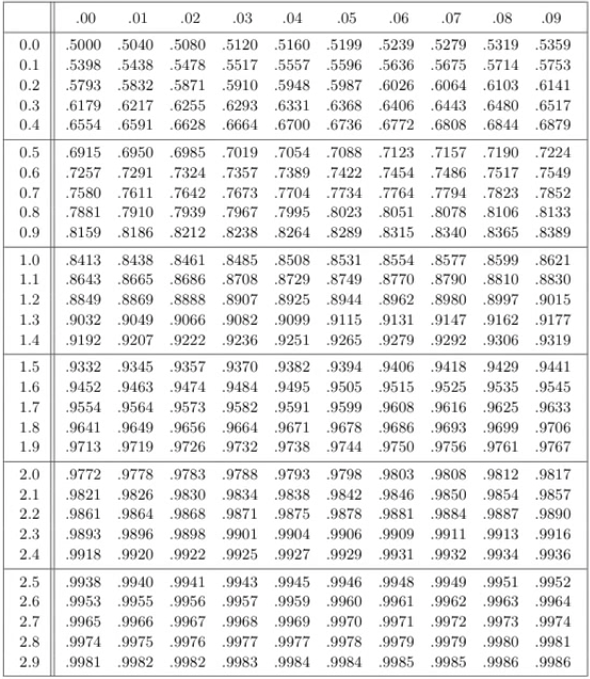

In [4]:
display(Image(filename='l8_3.png', embed=True, width=600))

* Vertical column is "coarse grain", with horizontal column "fine grain" adjustment for $y$
* Also note $\Phi(-y) = 1 - \Phi(y)$
<br><br>


**Standardizing a Random Variable (Mean Normalization):**
* Let $X$ be some random variable (not necessarily normal) with mean $\mu$ and variance $\sigma^2 > 0$
* Define $Y = \frac{X - \mu}{\sigma}$
  * $E[Y] = E[X] - \mu = 0$
  * $var(Y) = \frac{1}{\sigma^2}var(X) = 1$
  <br><br>
* If $X \approx N(\mu, \sigma^2)$, then $Y \approx N(0, 1)$
  * This is convenient b/c non-standard normals can be expressed in terms of standard normals: $X = \sigma Y + \mu \to$ X is non-standard, Y is standard
    * Use table for Y to calculate probabilities for X
    <br><br>
* Example: $X \approx N(\mu = 6,\ \sigma^2 = 2^2)$ and $Y = \frac{X - \mu}{\sigma} \to Y \approx N(0, 1)$
\begin{align}
P(2 \leq X \leq 8) &= P(\frac{2 - 6}{2} \leq \frac{X - 6}{2} \leq \frac{8 - 6}{2}) \\
&= P(-2 \leq Y \leq 1) \\
&= \Phi(1) - \Phi(-2) \\
&= \Phi(1) - (1 - \Phi(2)) \to use\ table
\end{align}
<br><br>


**Conditional PDFs:**
* Comparison summary with discrete PMF cases seen previously (Discrete PMF $\to$ Continuous PDF)

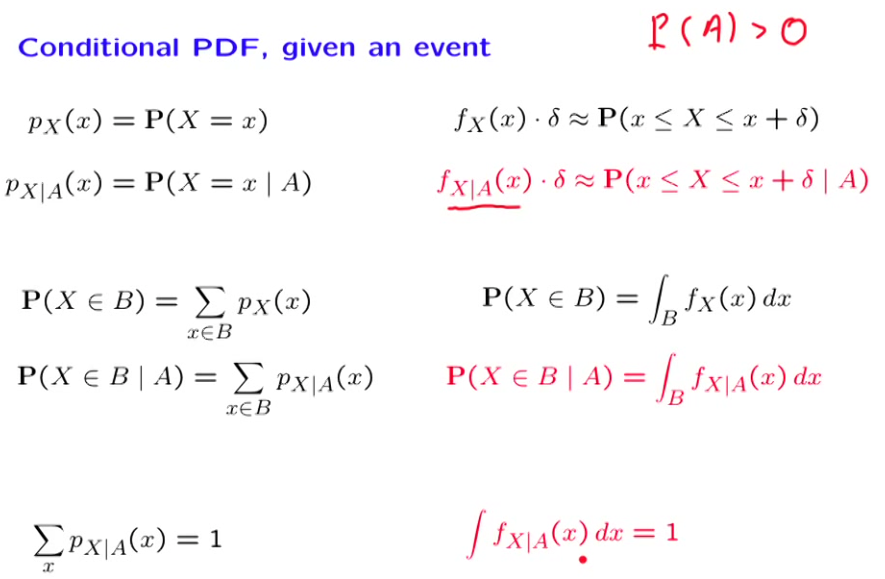

In [5]:
display(Image(filename='l9_1.png', embed=True, width=600))

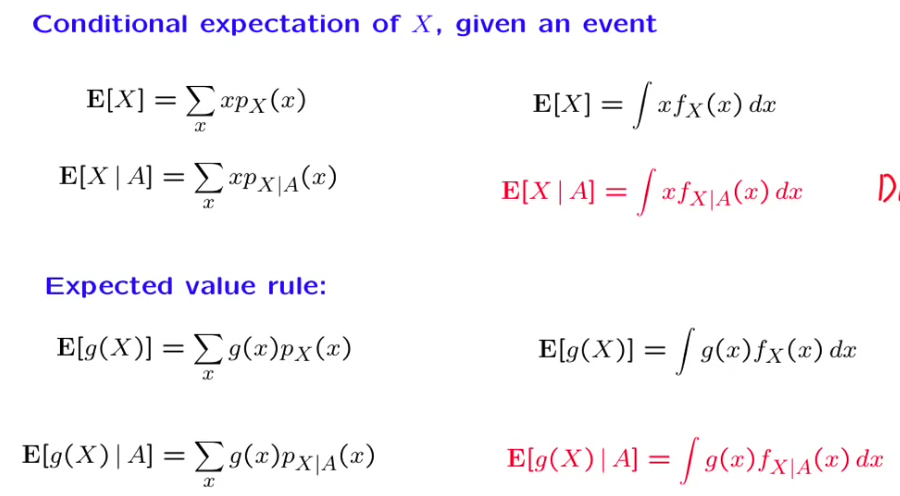

In [6]:
display(Image(filename='l9_3.png', embed=True, width=650))

* For Conditional PDF of $X$ given that $X \in A$, just scale PDF by $P(A)$:

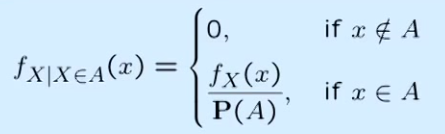

In [7]:
display(Image(filename='l9_2.png', embed=True, width=300))

**Total Probability Theorem and Total Expectation Theorem for Continuous Random Variables (PDFs):**
* Using fact that derivative of CDF is PDF in first written line to go from F $\to$ f:

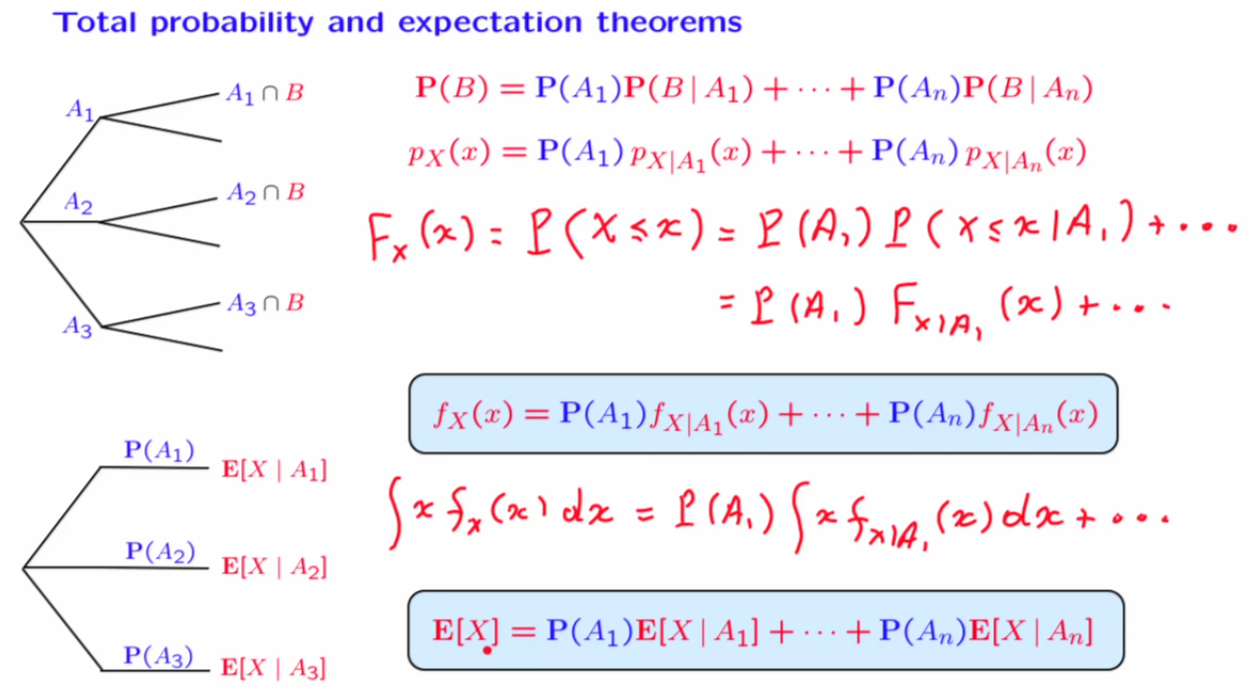

In [8]:
display(Image(filename='l9_4.png', embed=True, width=700))

**Mixed Distributions $\mathbf{\to}$ both Discrete and Continuous Random Variables:**
* A mixed random variable is described by continuous and discrete random variables:

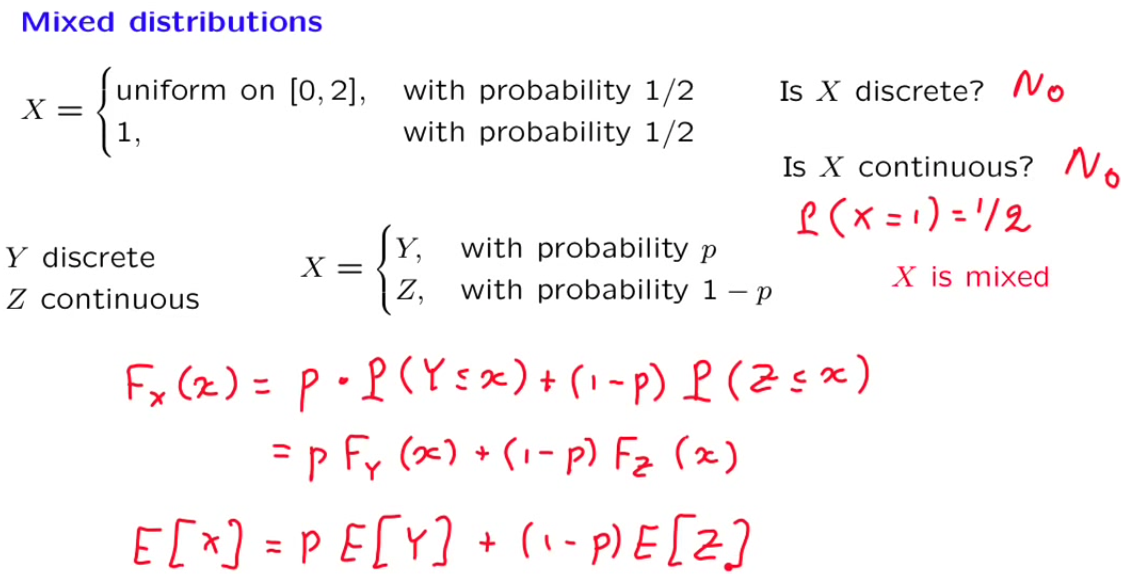

In [9]:
display(Image(filename='l9_5.png', embed=True, width=700))

* Mixed Random Variable $X$ **does not have a PMF or PDF of its own!** Only a CDF can be used to describe it:

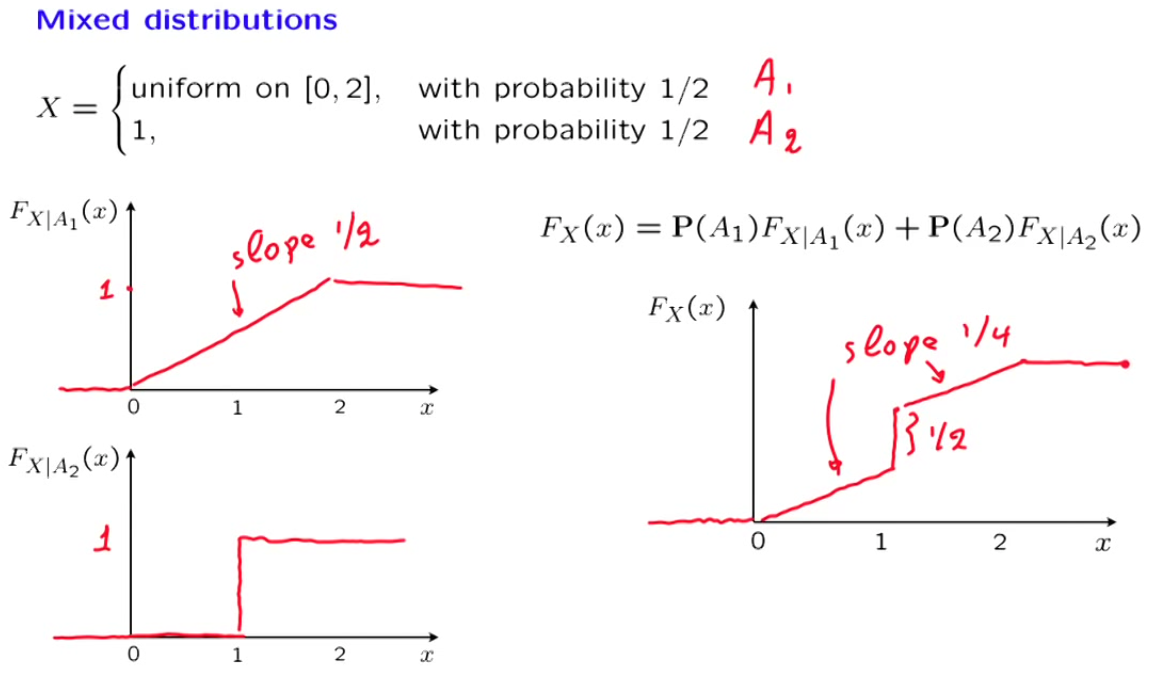

In [10]:
display(Image(filename='l9_6.png', embed=True, width=700))

***
## Lecture 8, 9, and 10 Exercises:  
Currently unavailable in archived course.

***
## Solved Problems:

**#1: Question 1:**

***
## Problem Set 5:  
See 2010 Problem Set 5.

In [12]:
!jupyter nbconvert Unit_05.ipynb --to html --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook Unit_05.ipynb to html
[NbConvertApp] Writing 2448430 bytes to Unit_05.html
